## Analyse exploratoire

In [133]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data = pd.read_csv("../output/cleaned_data/data_clean.csv", parse_dates=['date'])
data.head()

,order_id,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


### Analyse univariée

#### Variables qualitatives

Le mode est Smartphone
product
Smartphone         35
Smartwatch         34
Running Shoes      27
Headphones         25
Book               25
Laptop             24
Refrigerator       24
T-Shirt            20
Jeans              20
Washing Machine    16
Name: count, dtype: int64


<Axes: title={'center': 'Répartition du nombre de commande par produit'}, xlabel='product'>

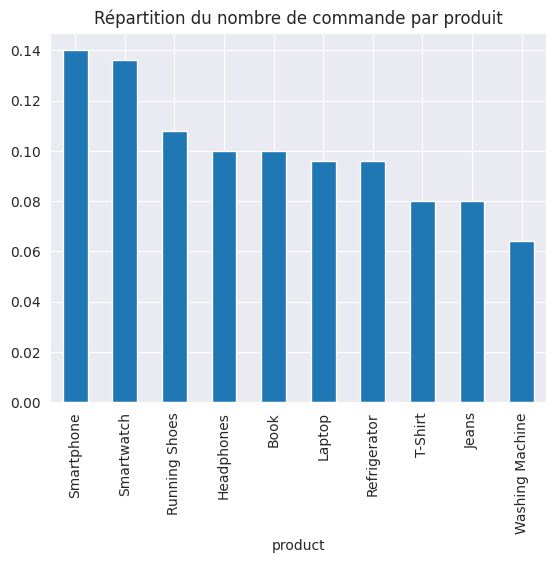

In [135]:
# variable product
print("Le mode est", data['product'].mode()[0])
print(data['product'].value_counts())
plt.title("Répartition du nombre de commande par produit")
data['product'].value_counts(normalize=True).plot(kind='bar')

Les produits les mieux vendus de notre échantillon sont les smartphones et smartwatch. Les moins vendues sont les T-shirts, les jeans et les machines à laver.

Le mode est Electronics
category
Electronics        118
Home Appliances     40
Clothing            40
Footwear            27
Books               25
Name: count, dtype: int64


<Axes: title={'center': 'Proportions des commandes par catégorie de produits'}>

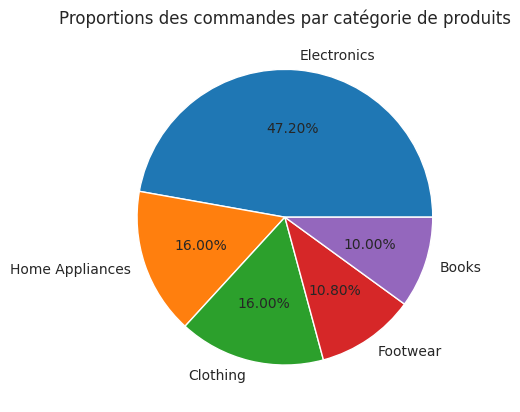

In [136]:
# variable category
print("Le mode est", data['category'].mode()[0])
print(data['category'].value_counts())
plt.title("Proportions des commandes par catégorie de produits")
data['category'].value_counts(normalize=True).plot(kind='pie', autopct="%.2f%%", label="")

Par contre, les ventes par catégories de produits sont clairement dominés par les produits Electroniques, qui representent ici près de la moitié (47,20%) des commandes de notre échantillon.

Le mode est Houston
customer_location
Houston          32
Miami            31
Dallas           29
New York         26
Boston           26
Denver           26
Chicago          22
Seattle          22
San Francisco    19
Los Angeles      17
Name: count, dtype: int64


<Axes: title={'center': 'Répartition du nombre de commandes par ville'}, xlabel='customer_location'>

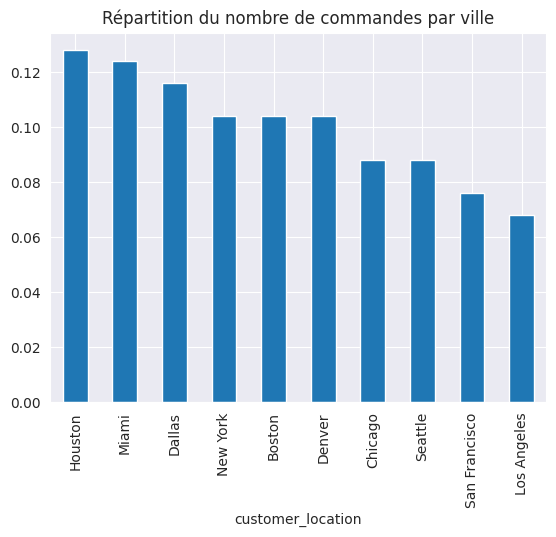

In [137]:
# variable customer_location
print("Le mode est", data['customer_location'].mode()[0])
print(data['customer_location'].value_counts())
plt.title("Répartition du nombre de commandes par ville")
data['customer_location'].value_counts(normalize=True).plot(kind='bar')

On retiendra que les commandes viennent principalement de Houston, Miami et Dallas.

Le mode est PayPal
payment_method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64


<Axes: title={'center': 'Proportions du nombre de commandes par moyen de paiement'}>

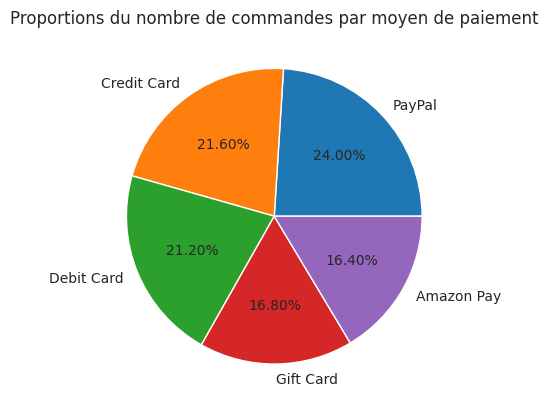

In [138]:
# variable payment_method
print("Le mode est", data['payment_method'].mode()[0])
print(data['payment_method'].value_counts())
plt.title("Proportions du nombre de commandes par moyen de paiement")
data['payment_method'].value_counts(normalize=True).plot(kind='pie', autopct="%.2f%%", label="")

Ici, il est bien clair que la répartition du nombre de moyens de paiement est à peu près équitable d'un moyen de paiement à l'autre. Il semble donc que les clients n'ont pas de préférence pour un moyen de paiement en particulier.

Le mode est Completed
status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64


<Axes: title={'center': 'Répartition du nombre de commandes par statut de commande'}, xlabel='status'>

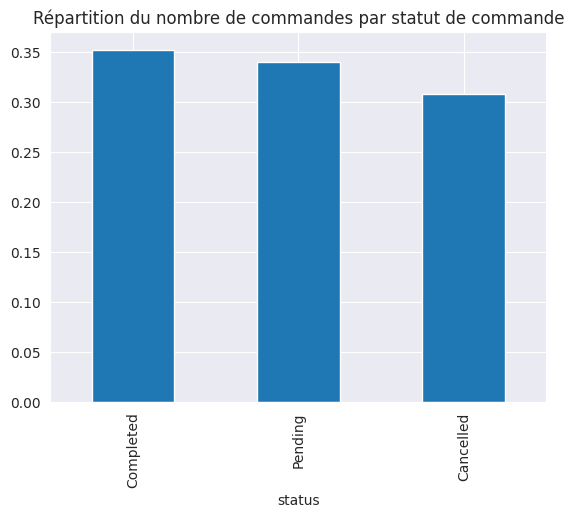

In [139]:
# variable status
print("Le mode est", data['status'].mode()[0])
print(data['status'].value_counts())
plt.title("Répartition du nombre de commandes par statut de commande")
data['status'].value_counts(normalize=True).plot(kind='bar')

Le nombre de commandes ne varie pas vraiment d'un statut à l'autre. C'est-à-dire qu'aucun statut ne prend le dessus sur un autre. Ce qui signifie que deux clients sur trois ne complètent pas leur commande. Et du coup, on note un faible taux d'engagement chez les clients à compléter leur commande. Il faudra donc trouver des solutions à cela.

#### Variables quantitatives

La moyenne: 343.58
L'écart-type: 380.6358076590918
La médiane: 150.0
1er quartile 40.0


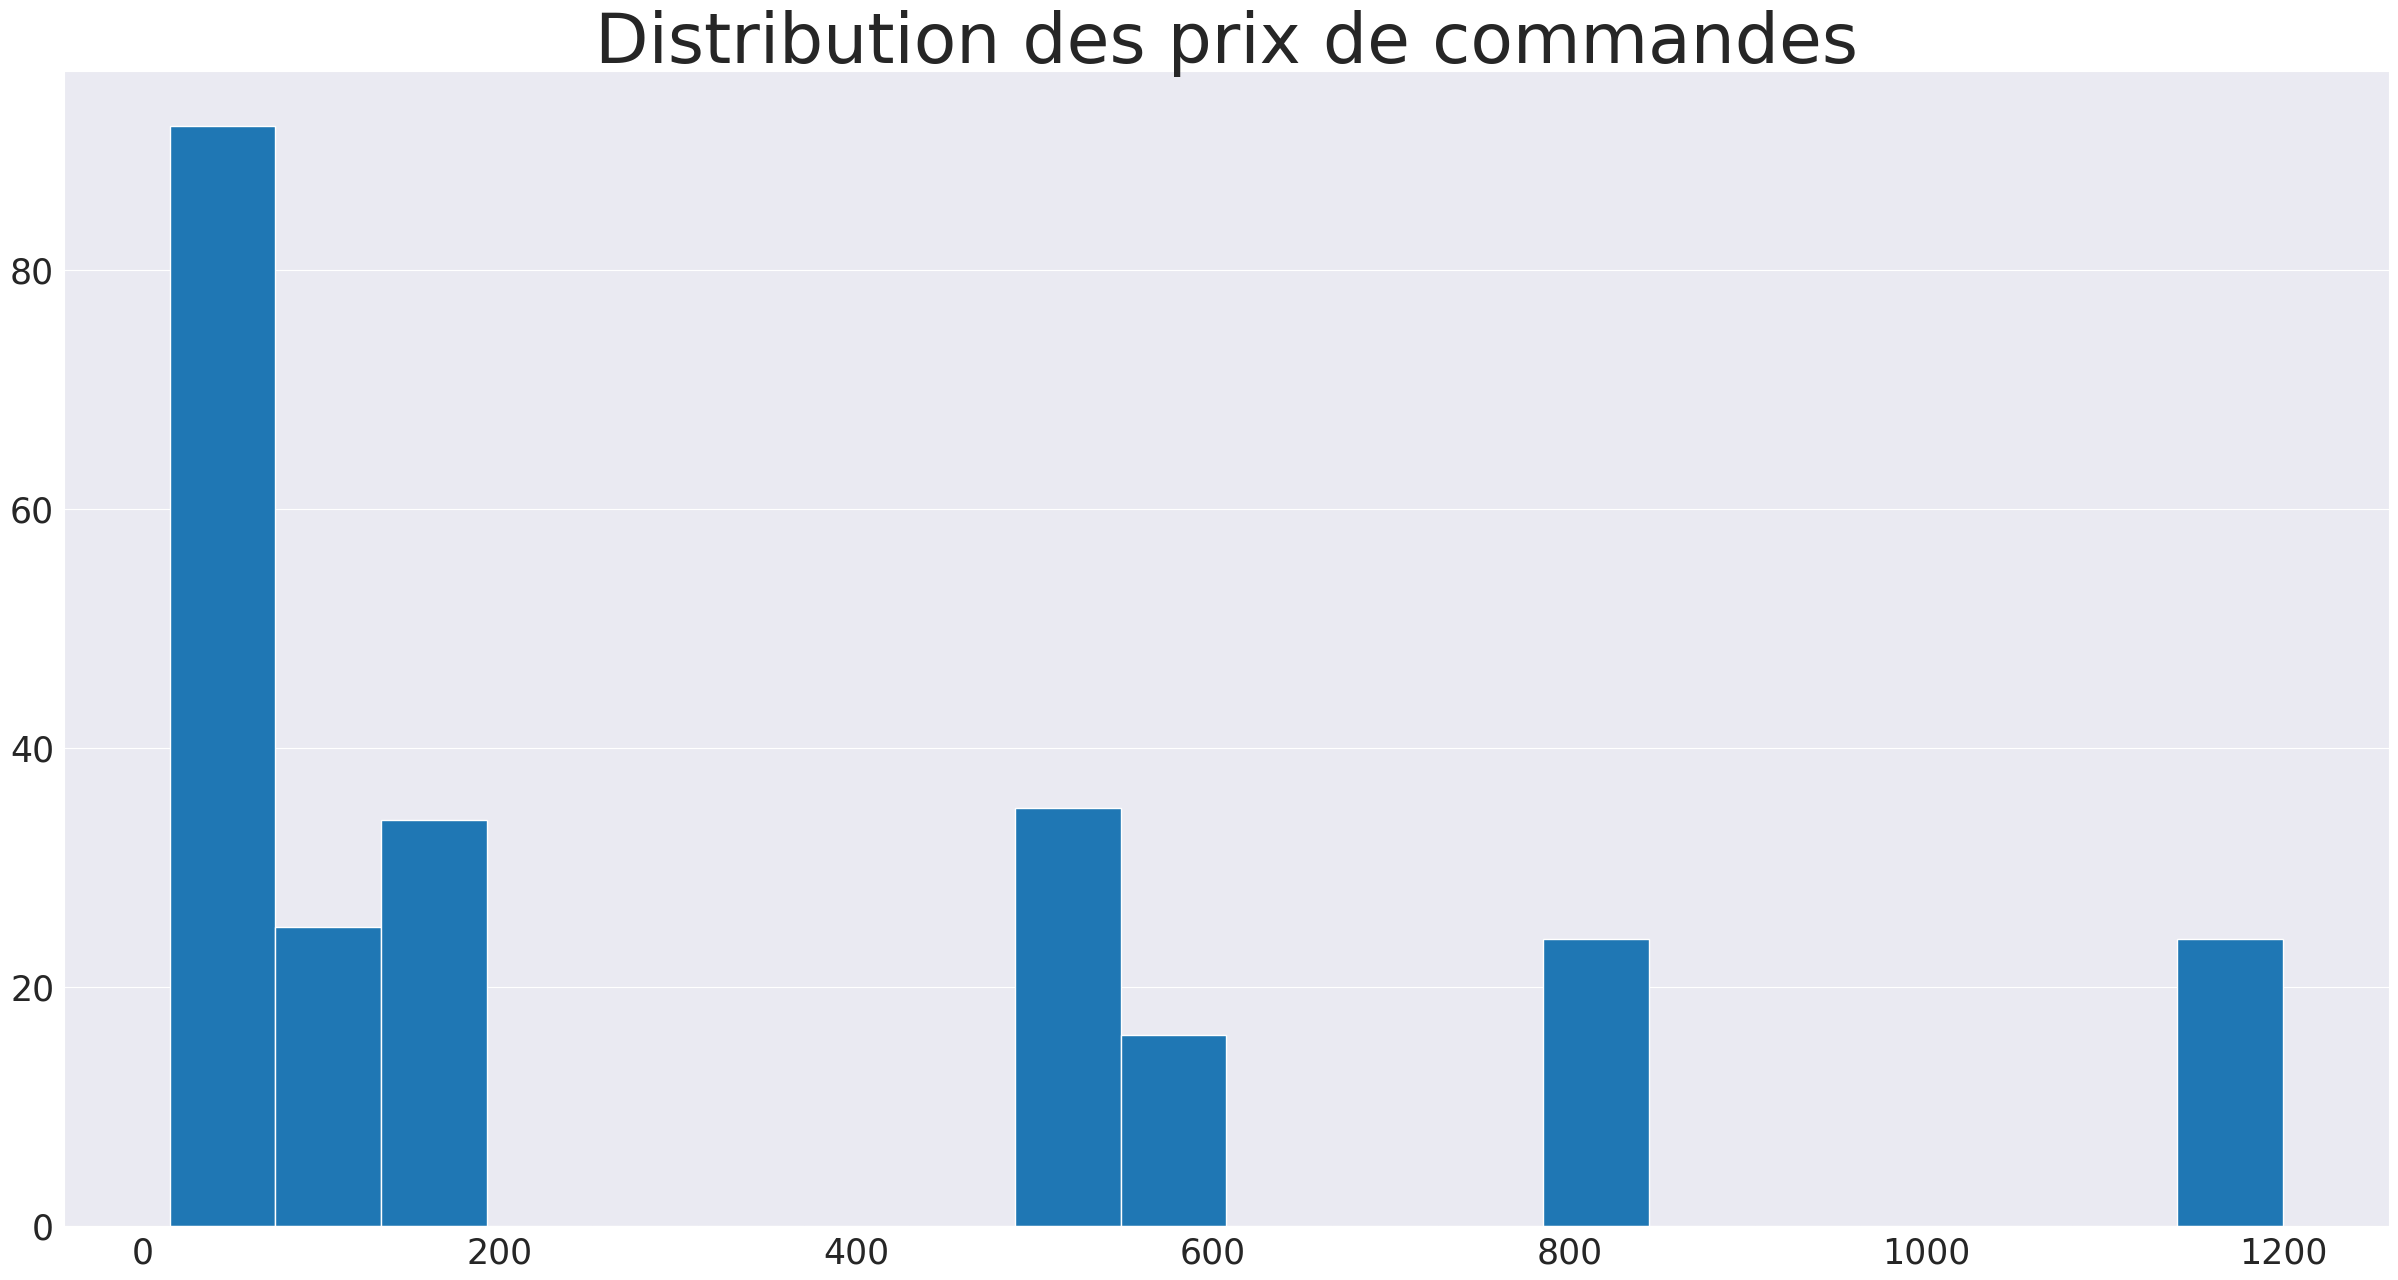

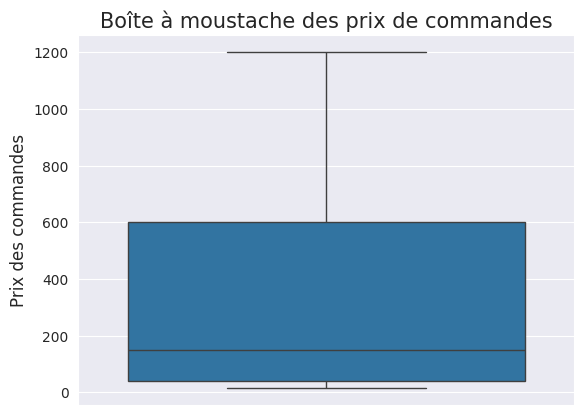

In [140]:
# prix des commandes
print("La moyenne:", data["price"].mean())
print("L'écart-type:", data["price"].std())
print("La médiane:", data["price"].median())
print("1er quartile", np.percentile(data['price'], 25))

# Histogramme

plt.figure(figsize=(30, 15))
plt.title("Distribution des prix de commandes", fontsize=50)
plt.grid(axis="x")
plt.tick_params(labelsize=25)

plt.hist(data["price"], bins=20)
plt.show()

# Boîte à Moustache
plt.title("Boîte à moustache des prix de commandes", fontsize=15)
plt.grid(axis="x")
plt.ylabel("Prix des commandes", fontsize=12)
plt.tick_params(labelsize=10)

sns.boxplot(data["price"])
plt.show()

Par rapport aux prix des commandes, on constate grâce à l'histogramme, une forte concentration entre 40 et 200 dollars. De plus la moyenne (344 dollars) et l'écart-type (380 dollars) indique qu'il y a une forte dispersion des prix des commandes autour de la moyenne. À partir du boxplot, on retiendra que 50% des clients font des achats de produits dont le prix ne dépasse pas les 150 dollars.

La moyenne: 2.856
L'écart-type: 1.4294886326949283
La médiane: 3.0


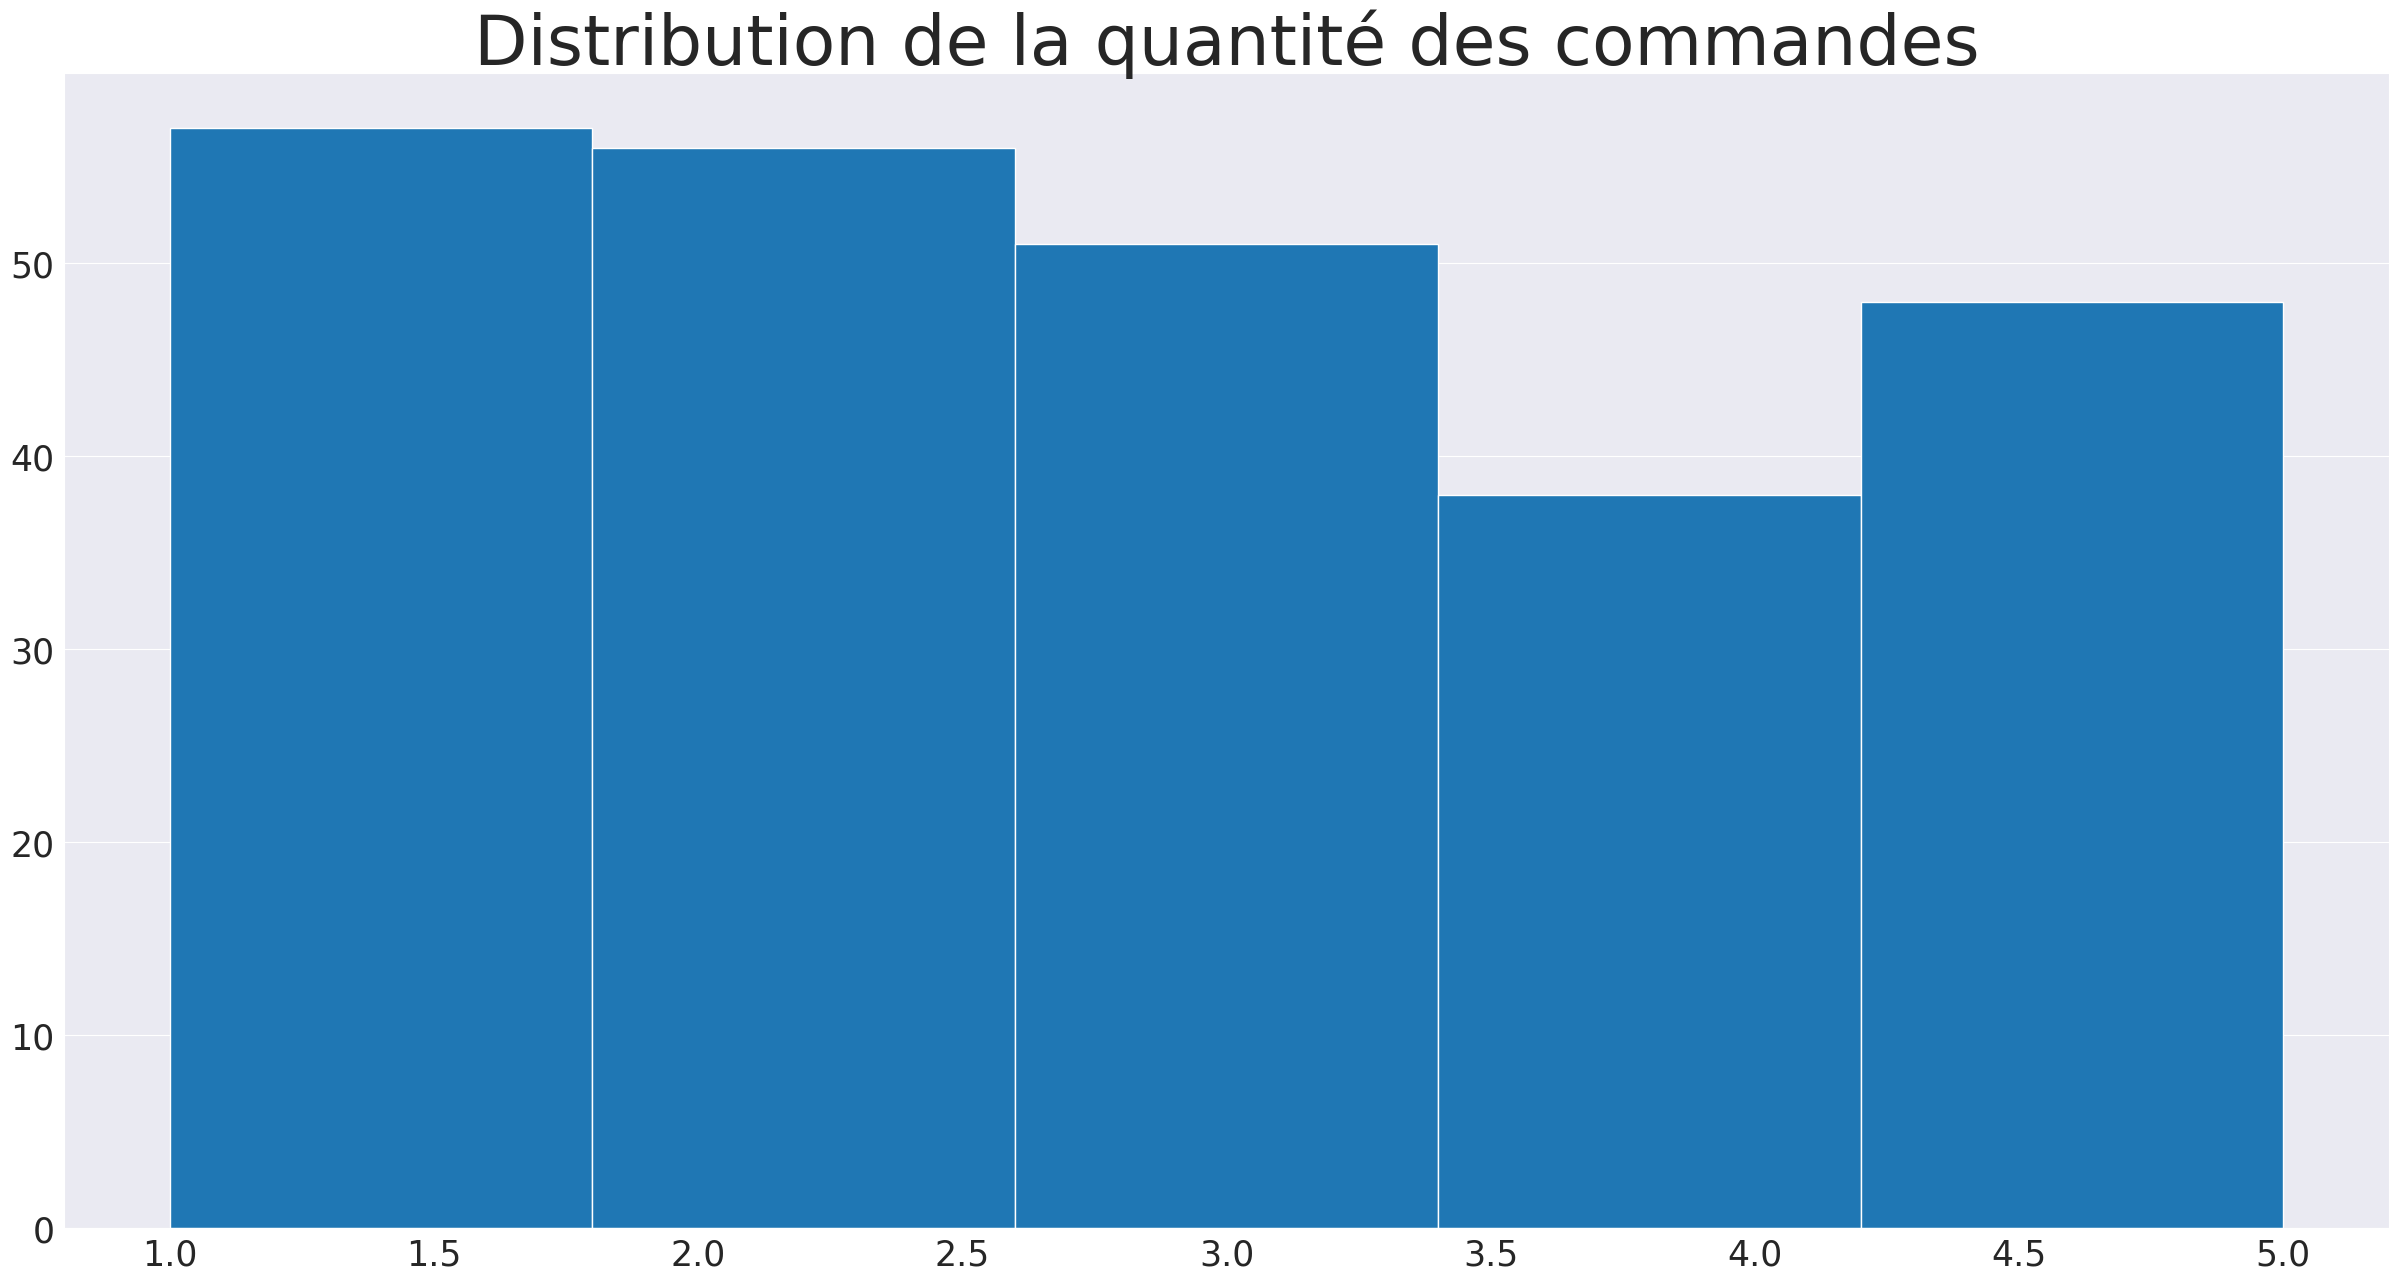

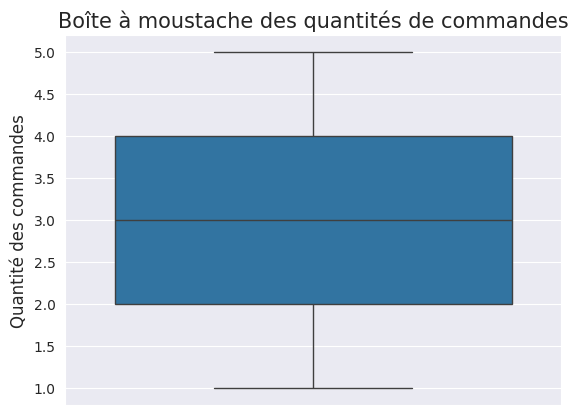

In [141]:
# quantité des commandes
print("La moyenne:", data["quantity"].mean())
print("L'écart-type:", data["quantity"].std())
print("La médiane:", data["quantity"].median())

# Histogramme
plt.figure(figsize=(30, 15))
plt.title("Distribution de la quantité des commandes", fontsize=50)
plt.grid(axis="x")
plt.tick_params(labelsize=25)

plt.hist(data["quantity"], bins=5)
plt.show()

# Boîte à Moustache
plt.title("Boîte à moustache des quantités de commandes", fontsize=15)
plt.grid(axis="x")
plt.ylabel("Quantité des commandes", fontsize=12)
plt.tick_params(labelsize=10)

sns.boxplot(data["quantity"])
plt.show()

La quantité de commande a une répartition peu informative, mais avec le boxplot, on obtient plus de précision : 50% des produits sont commandés en maximum trois exemplaires.

La moyenne: 975.38
L'écart-type: 1252.1122537472172
La médiane: 400.0
1er quartile 40.0
3e quartile 600.0
Le skewness: 1.688496248133406


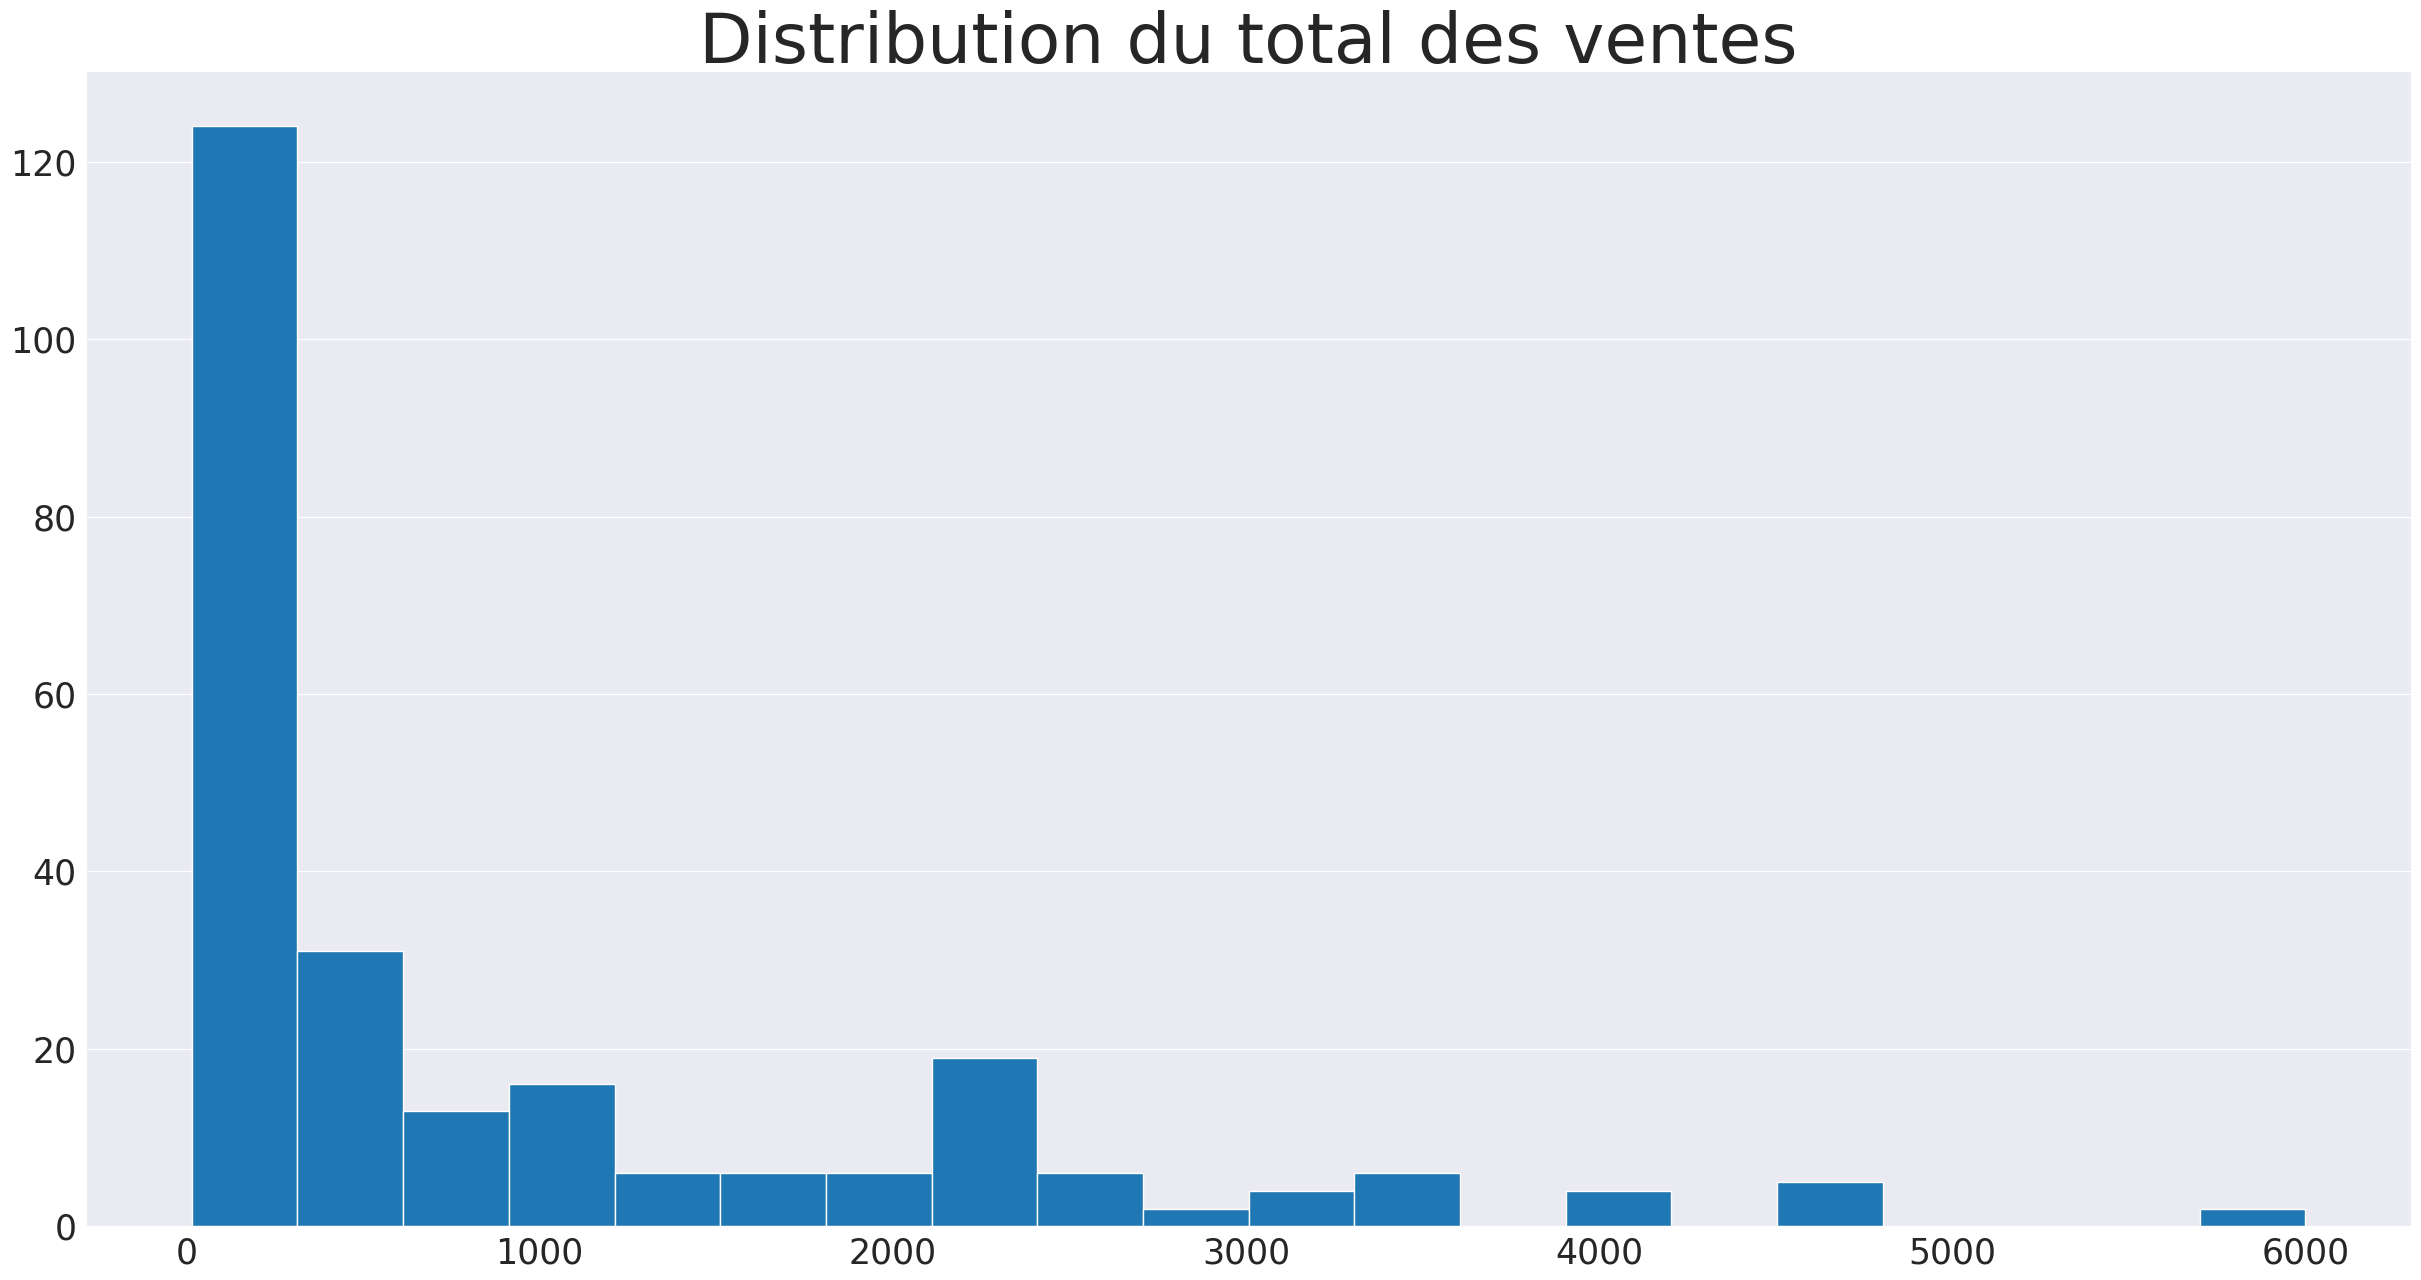

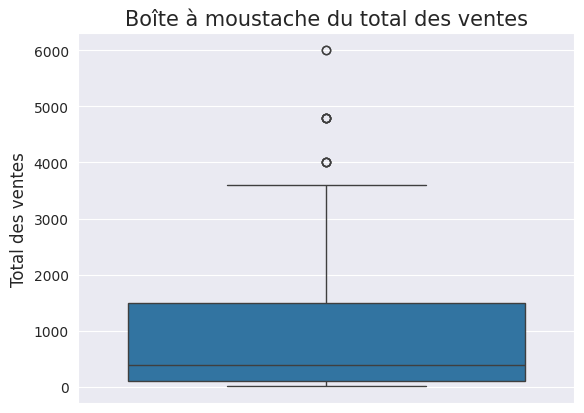

In [157]:
# total des ventes
print("La moyenne:", data["total_sales"].mean())
print("L'écart-type:", data["total_sales"].std())
print("La médiane:", data["total_sales"].median())
print("1er quartile", np.percentile(data['price'], 25))
print("3e quartile", np.percentile(data['price'], 75))
print("Le skewness:", data["total_sales"].skew())

# Histogramme
plt.figure(figsize=(30, 15))
plt.title("Distribution du total des ventes", fontsize=50)
plt.grid(axis="x")
plt.tick_params(labelsize=25)

plt.hist(data["total_sales"], bins=20)
plt.show()

# Boîte à Moustache
plt.title("Boîte à moustache du total des ventes", fontsize=15)
plt.grid(axis="x")
plt.ylabel("Total des ventes", fontsize=12)
plt.tick_params(labelsize=10)

sns.boxplot(data["total_sales"])
plt.show()

Enfin, la répartition du total des ventes, présente une très forte concentration entre 40 dollars et 600 dollars environ puis s'étale vers la droite (skewness > 1). On en déduit qu'au-delà de 600 dollars le nombre de commandes diminue drastiquement. Les clients ont moins tendances à dépenser au-delà de 600 dollars pour la même commande. De plus la médiane indique bien que 50% des commandes ont un prix total en dessous des 400 dollars. On remarque également des outliers qui montrent que les commandes dont le prix total dépasse les 3500 dollars sont très rares, voire exceptionnelles.

### Analyse Bivariée